<a href="https://colab.research.google.com/github/Agung-D-Cahyo/bigdata/blob/master/1800018162.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>**Agung Dwi Cahyo**<br>
# **<center>1800018162<br>**
# **<center>D**










In [95]:
! apt-get install openjdk-8-jdk-headless -qq > /dev/null
! wget -q https://downloads.apache.org/spark/spark-2.4.6/spark-2.4.6-bin-hadoop2.7.tgz
! tar xf spark-2.4.6-bin-hadoop2.7.tgz
! pip install -q findspark
! pip install pyspark_dist_explore

In [96]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.5-bin-hadoop2.7"

In [97]:
import findspark
findspark.init("spark-2.4.6-bin-hadoop2.7")# SPARK_HOME
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.functions import col, avg
from matplotlib import pyplot as plt
from pyspark_dist_explore import Histogram, hist

In [98]:
sc = spark.sparkContext
spark = SparkSession(sc)

## **EDA**

In [99]:
data = spark.read.csv('Game_list_rating.csv', header=True, inferSchema=True)
data.printSchema()

root
 |-- Game_Name: string (nullable = true)
 |-- game_released: timestamp (nullable = true)
 |-- game_rating: double (nullable = true)
 |-- game_platform: string (nullable = true)
 |-- game_genres: string (nullable = true)
 |-- game_stores: string (nullable = true)
 |-- game_tags_name: string (nullable = true)



In [100]:
# total baris
data.count()

980

In [101]:
data.show()

+--------------------+-------------------+-----------+--------------------+--------------------+--------------------+--------------------+
|           Game_Name|      game_released|game_rating|       game_platform|         game_genres|         game_stores|      game_tags_name|
+--------------------+-------------------+-----------+--------------------+--------------------+--------------------+--------------------+
|  Grand Theft Auto V|2013-09-17 00:00:00|       4.47|['PC', 'PlayStati...|['Action', 'Shoot...|['PlayStation Sto...|['Full controller...|
|            Portal 2|2011-04-19 00:00:00|       4.61|['PlayStation 3',...|['Shooter', 'Puzz...|['Xbox 360 Store'...|['Captions availa...|
|The Witcher 3: Wi...|2015-05-18 00:00:00|       4.68|['PC', 'Xbox One'...|             ['RPG']|['GOG', 'Xbox Sto...|['Full controller...|
|The Elder Scrolls...|2011-11-11 00:00:00|       4.41|['PC', 'PlayStati...|   ['Action', 'RPG']|['Xbox 360 Store'...|['Action RPG', 'P...|
|       Left 4 Dead 2|2009-

In [102]:
data.describe().show()

+-------+-------------+------------------+--------------------+--------------------+--------------------+--------------+
|summary|    Game_Name|       game_rating|       game_platform|         game_genres|         game_stores|game_tags_name|
+-------+-------------+------------------+--------------------+--------------------+--------------------+--------------+
|  count|          980|               980|                 980|                 980|                 980|           980|
|   mean|         null| 3.659816326530613|                null|                null|                null|          null|
| stddev|         null|0.5550258503203033|                null|                null|                null|          null|
|    min|7 Days to Die|              1.74|['Android', 'Linu...|['Action', 'Adven...|['App Store', 'Ep...|  "[""1990's""|
|    max|     inFamous|              4.69|['macOS', 'iOS', ...|                  []|                  []|            []|
+-------+-------------+---------

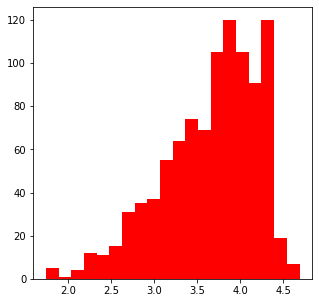

In [146]:
rating = data.select('game_rating')

fig, axes = plt.subplots()
fig.set_size_inches(5, 5)
hist(axes, rating, bins=20, color="red")
plt.show()

In [103]:
table = ['Game_Name', 'game_rating', 'game_platform', 'game_genres', 'game_stores', 'game_tags_name']

for kolom in table:
  print('jumlah data yang bernilai null pada colom ', kolom, ' : ', data.where(col(kolom).isNull()).count())

jumlah data yang bernilai null pada colom  Game_Name  :  0
jumlah data yang bernilai null pada colom  game_rating  :  0
jumlah data yang bernilai null pada colom  game_platform  :  0
jumlah data yang bernilai null pada colom  game_genres  :  0
jumlah data yang bernilai null pada colom  game_stores  :  0
jumlah data yang bernilai null pada colom  game_tags_name  :  0


## **PRE PROCESSING**

In [104]:
# pre processing
# seleksi data
datagame = data.select('Game_Name', 'game_genres', 'game_rating')

# kumpulkan genre
genre = datagame.select('game_genres')

# tampilkan 10 data teratas
datagame.show(10)

+--------------------+--------------------+-----------+
|           Game_Name|         game_genres|game_rating|
+--------------------+--------------------+-----------+
|  Grand Theft Auto V|['Action', 'Shoot...|       4.47|
|            Portal 2|['Shooter', 'Puzz...|       4.61|
|The Witcher 3: Wi...|             ['RPG']|       4.68|
|The Elder Scrolls...|   ['Action', 'RPG']|       4.41|
|       Left 4 Dead 2|['Action', 'Shoot...|       4.11|
|       Borderlands 2|['Action', 'Shoot...|       4.05|
|   BioShock Infinite|['Action', 'Shoot...|       4.37|
|              Portal|['Action', 'Adven...|       4.51|
|     Life is Strange|       ['Adventure']|       4.11|
|Counter-Strike: G...|['Action', 'Shoot...|       3.59|
+--------------------+--------------------+-----------+
only showing top 10 rows



In [105]:
genre.show()

+--------------------+
|         game_genres|
+--------------------+
|['Action', 'Shoot...|
|['Shooter', 'Puzz...|
|             ['RPG']|
|   ['Action', 'RPG']|
|['Action', 'Shoot...|
|['Action', 'Shoot...|
|['Action', 'Shoot...|
|['Action', 'Adven...|
|       ['Adventure']|
|['Action', 'Shoot...|
|['Action', 'Adven...|
|['Action', 'Adven...|
|['Action', 'Shoot...|
|['Action', 'Shoot...|
|['Action', 'Shoot...|
|['Action', 'Shoot...|
|   ['Action', 'RPG']|
|['Action', 'Shoot...|
|['Action', 'Adven...|
|['Action', 'Adven...|
+--------------------+
only showing top 20 rows



In [106]:
genre.collect()[0][0]

genre.show(truncate=False)


+--------------------------------------------------------+
|game_genres                                             |
+--------------------------------------------------------+
|['Action', 'Shooter']                                   |
|['Shooter', 'Puzzle']                                   |
|['RPG']                                                 |
|['Action', 'RPG']                                       |
|['Action', 'Shooter']                                   |
|['Action', 'Shooter', 'RPG']                            |
|['Action', 'Shooter']                                   |
|['Action', 'Adventure', 'Puzzle']                       |
|['Adventure']                                           |
|['Action', 'Shooter']                                   |
|['Action', 'Adventure']                                 |
|['Action', 'Adventure', 'Indie', 'Puzzle', 'Platformer']|
|['Action', 'Shooter']                                   |
|['Action', 'Shooter']                                  

In [108]:
data.show()

+--------------------+-------------------+-----------+--------------------+--------------------+--------------------+--------------------+
|           Game_Name|      game_released|game_rating|       game_platform|         game_genres|         game_stores|      game_tags_name|
+--------------------+-------------------+-----------+--------------------+--------------------+--------------------+--------------------+
|  Grand Theft Auto V|2013-09-17 00:00:00|       4.47|['PC', 'PlayStati...|['Action', 'Shoot...|['PlayStation Sto...|['Full controller...|
|            Portal 2|2011-04-19 00:00:00|       4.61|['PlayStation 3',...|['Shooter', 'Puzz...|['Xbox 360 Store'...|['Captions availa...|
|The Witcher 3: Wi...|2015-05-18 00:00:00|       4.68|['PC', 'Xbox One'...|             ['RPG']|['GOG', 'Xbox Sto...|['Full controller...|
|The Elder Scrolls...|2011-11-11 00:00:00|       4.41|['PC', 'PlayStati...|   ['Action', 'RPG']|['Xbox 360 Store'...|['Action RPG', 'P...|
|       Left 4 Dead 2|2009-

## **PEMROSESAN DATA**

In [125]:
genre_action = data.filter(data.game_genres == "['Action']")
genre_action.sort(genre_action.game_rating.desc()).show()

+--------------------+-------------------+-----------+--------------------+-----------+--------------------+--------------------+
|           Game_Name|      game_released|game_rating|       game_platform|game_genres|         game_stores|      game_tags_name|
+--------------------+-------------------+-----------+--------------------+-----------+--------------------+--------------------+
|          God of War|2018-04-20 00:00:00|        4.6|   ['PlayStation 4']| ['Action']|['PlayStation Sto...|['Action-Adventur...|
|Grand Theft Auto:...|2004-10-26 00:00:00|       4.46|['PC', 'iOS', 'ma...| ['Action']|['PlayStation Sto...|['Partial Control...|
| Marvel's Spider-Man|2018-09-07 00:00:00|       4.45|   ['PlayStation 4']| ['Action']|['PlayStation Sto...|"['Action-Adventu...|
|Dark Souls: Remas...|2018-05-23 00:00:00|       4.38|['PC', 'PlayStati...| ['Action']|['Steam', 'Xbox S...|['Full controller...|
|      God of War III|2010-03-16 00:00:00|       4.37|   ['PlayStation 3']| ['Action']|   

In [126]:
genre_rpg = data.filter(data.game_genres == "['RPG']")
genre_rpg.sort(genre_rpg.game_rating.desc()).show()

+--------------------+-------------------+-----------+--------------------+-----------+--------------------+--------------------+
|           Game_Name|      game_released|game_rating|       game_platform|game_genres|         game_stores|      game_tags_name|
+--------------------+-------------------+-----------+--------------------+-----------+--------------------+--------------------+
|The Witcher 3: Wi...|2015-05-18 00:00:00|       4.68|['PC', 'Xbox One'...|    ['RPG']|['GOG', 'Xbox Sto...|['Full controller...|
|The Elder Scrolls...|2002-05-02 00:00:00|       4.38|['PC', 'Xbox 360'...|    ['RPG']|['Xbox 360 Store'...|['Action RPG', 'S...|
| Dragon Age: Origins|2009-11-03 00:00:00|       4.36|['PC', 'PlayStati...|    ['RPG']|['Xbox 360 Store'...|['Atmospheric', '...|
|Fallout 2: A Post...|1998-09-30 00:00:00|       4.34|     ['PC', 'macOS']|    ['RPG']|    ['GOG', 'Steam']|['2D', 'Steam Clo...|
|The Elder Scrolls...|2006-03-20 00:00:00|        4.3|['PC', 'PlayStati...|    ['RPG']|['P

In [127]:
genre_strategi = data.filter(data.game_genres == "['Strategy']")
genre_strategi.sort(genre_strategi.game_rating.desc()).show()

+--------------------+-------------------+-----------+--------------------+------------+--------------------+--------------------+
|           Game_Name|      game_released|game_rating|       game_platform| game_genres|         game_stores|      game_tags_name|
+--------------------+-------------------+-----------+--------------------+------------+--------------------+--------------------+
|Sid Meier's Civil...|2010-09-21 00:00:00|       4.31|['Linux', 'macOS'...|['Strategy']|['App Store', 'St...|['4X', 'Steam Ach...|
|    Worms Armageddon|1999-01-29 00:00:00|       4.28|['PC', 'Nintendo ...|['Strategy']|    ['GOG', 'Steam']|        "[""1990's""|
|Plants vs. Zombie...|2009-05-05 00:00:00|       4.27|['PS Vita', 'Andr...|['Strategy']|['Xbox 360 Store'...|['2D', 'Steam Ach...|
|Age of Empires II HD|2013-04-09 00:00:00|       4.26|              ['PC']|['Strategy']|           ['Steam']|['2D', 'Captions ...|
|Europa Universali...|2013-08-13 00:00:00|       4.25|['PC', 'Linux', '...|['Strate

In [128]:
genre_sport = data.filter(data.game_genres == "['Sports']")
genre_sport.sort(genre_sport.game_rating.desc()).show()

+-----------------+-------------------+-----------+--------------------+-----------+--------------------+--------------------+
|        Game_Name|      game_released|game_rating|       game_platform|game_genres|         game_stores|      game_tags_name|
+-----------------+-------------------+-----------+--------------------+-----------+--------------------+--------------------+
|          FIFA 18|2017-09-26 00:00:00|       3.42|['PC', 'Nintendo ...| ['Sports']|['Nintendo Store'...|['Multiplayer', '...|
|EA SPORTS FIFA 17|2016-09-27 00:00:00|       3.29|['PlayStation 4',...| ['Sports']|['Xbox 360 Store'...|['e-sports', 'Foo...|
|          FIFA 15|2014-09-20 00:00:00|       3.29|['Xbox One', 'Nin...| ['Sports']|['Xbox 360 Store'...|['Football', 'Mul...|
|EA SPORTS FIFA 16|2015-09-22 00:00:00|       3.28|['Xbox 360', 'Pla...| ['Sports']|['Xbox Store', 'X...|['Football', 'Mul...|
|          FIFA 14|2013-09-23 00:00:00|       3.24|['Xbox One', 'iOS...| ['Sports']|['Xbox 360 Store'...|['Foot

In [130]:
genre_racing = data.filter(data.game_genres == "['Racing']")
genre_racing.sort(genre_racing.game_rating.desc()).show()

+--------------+-------------------+-----------+--------------------+-----------+--------------------+--------------------+
|     Game_Name|      game_released|game_rating|       game_platform|game_genres|         game_stores|      game_tags_name|
+--------------+-------------------+-----------+--------------------+-----------+--------------------+--------------------+
| Trials Fusion|2014-04-15 00:00:00|       3.51|['PC', 'Xbox One'...| ['Racing']|['Xbox Store', 'X...|['2.5D', '2D', 'P...|
|Need for Speed|2015-11-03 00:00:00|       3.33|['PC', 'Xbox One'...| ['Racing']|['PlayStation Sto...|['Multiplayer', '...|
|       RACE 07|2007-10-15 00:00:00|       2.18|              ['PC']| ['Racing']|           ['Steam']|['Driving', 'Mult...|
+--------------+-------------------+-----------+--------------------+-----------+--------------------+--------------------+



## **VISUALISASI DATA**

**Genre Action**

Text(0, 0.5, 'Rating')

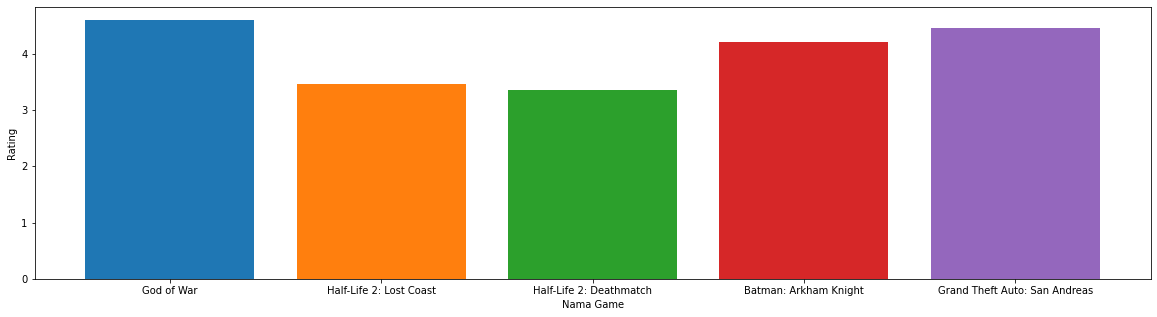

In [139]:
fig, axes = plt.subplots()
fig.set_size_inches(20, 5)

for i in range(5):
  plt.bar(genre_action.collect()[i][0], genre_action.collect()[i][2])

plt.xlabel('Nama Game')
plt.ylabel('Rating')

### **Genre Adventure**

Text(0, 0.5, 'Rating')

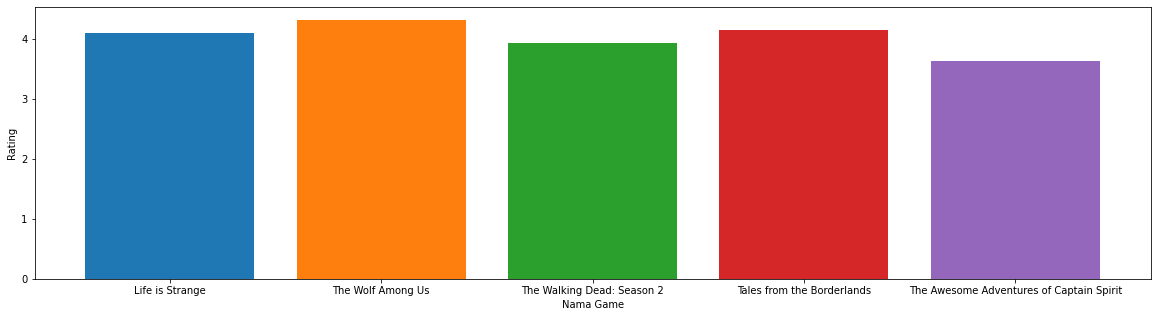

In [140]:
fig, axes = plt.subplots()
fig.set_size_inches(20, 5)

for i in range(5):
  plt.bar(genre_Advantur.collect()[i][0], genre_Advantur.collect()[i][2])

plt.xlabel('Nama Game')
plt.ylabel('Rating')

### **Genre Sports**

Text(0, 0.5, 'Rating')

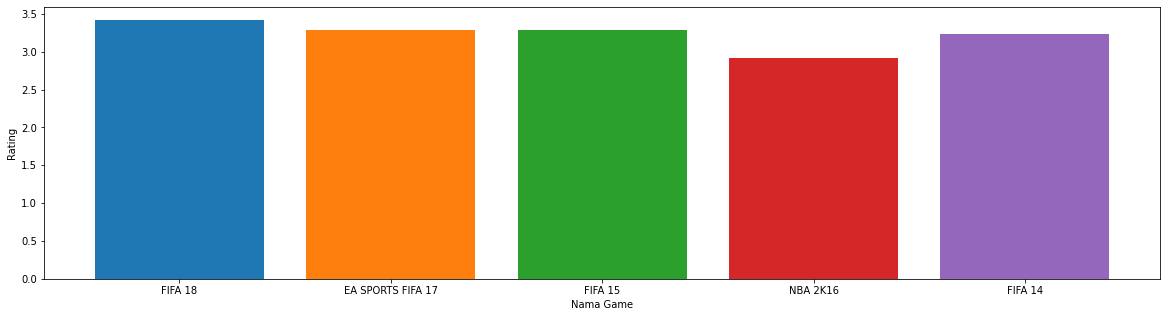

In [141]:
fig, axes = plt.subplots()
fig.set_size_inches(20, 5)

for i in range(5):
  plt.bar(genre_sport.collect()[i][0], genre_sport.collect()[i][2])

plt.xlabel('Nama Game')
plt.ylabel('Rating')

### **Genre Racing**

Text(0, 0.5, 'Rating')

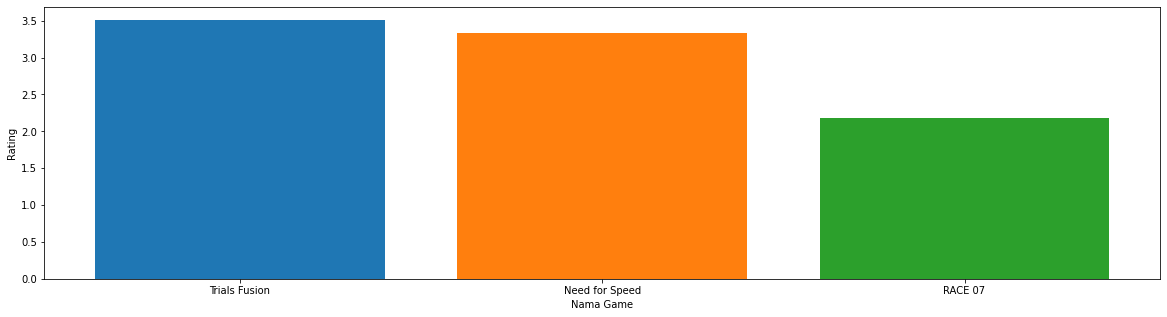

In [143]:
fig, axes = plt.subplots()
fig.set_size_inches(20, 5)

for i in range(3):
  plt.bar(genre_racing.collect()[i][0], genre_racing.collect()[i][2])

plt.xlabel('Nama Game')
plt.ylabel('Rating')

### **Genre Strategi**

Text(0, 0.5, 'Rating')

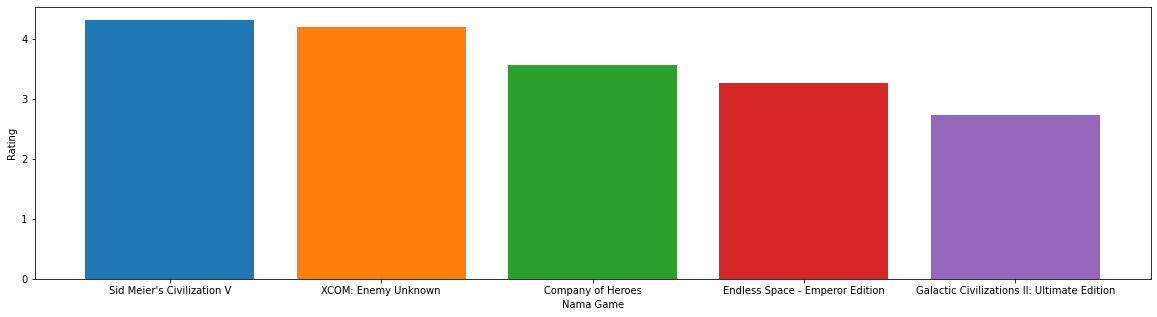

In [144]:
fig, axes = plt.subplots()
fig.set_size_inches(20, 5)

for i in range(5):
  plt.bar(genre_strategi.collect()[i][0], genre_strategi.collect()[i][2])

plt.xlabel('Nama Game')
plt.ylabel('Rating')

### **Genre RPG**

Text(0, 0.5, 'Rating')

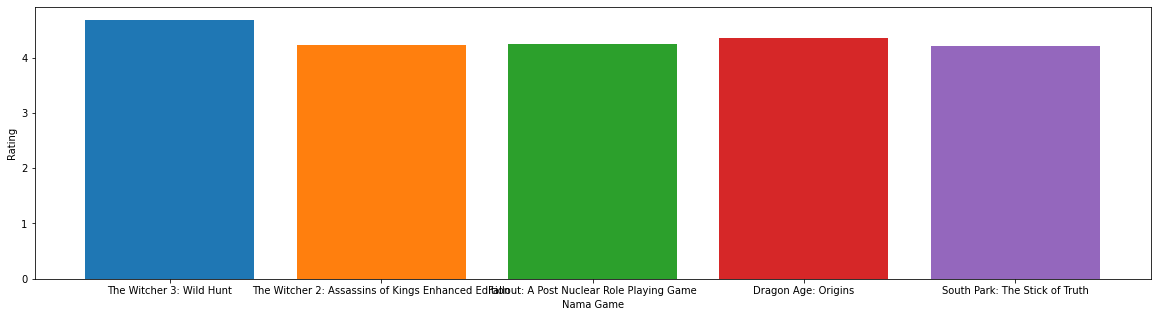

In [145]:
fig, axes = plt.subplots()
fig.set_size_inches(20, 5)

for i in range(5):
  plt.bar(genre_rpg.collect()[i][0], genre_rpg.collect()[i][2])

plt.xlabel('Nama Game')
plt.ylabel('Rating')